In [84]:
import pandas as pd
from datetime import datetime

In [85]:
weather_data_filepath = "data/weather_data.csv"
electricity_data_filepath = "data/electricity_production_data.csv"

df_weather = pd.read_csv(weather_data_filepath, delimiter=',')
df_electricity = pd.read_csv(electricity_data_filepath, delimiter=',')

In [86]:
df_weather['time'] = pd.to_datetime(df_weather['referenceTime'])
df_electricity['time'] = pd.to_datetime(df_electricity['måned'], format='%YM%m')


In [87]:
df_weather.tail()

,referenceTime,value,time
817,2019-05-31T22:00:00Z,69.2,2019-05-31 22:00:00+00:00
818,2019-06-30T22:00:00Z,49.0,2019-06-30 22:00:00+00:00
819,2019-07-31T22:00:00Z,59.6,2019-07-31 22:00:00+00:00
820,2019-08-31T22:00:00Z,170.3,2019-08-31 22:00:00+00:00
821,2019-09-30T22:00:00Z,67.3,2019-09-30 22:00:00+00:00


In [88]:
df_electricity.head()

,måned,value,time
0,1993M01,698737,1993-01-01
1,1993M02,654965,1993-02-01
2,1993M03,673560,1993-03-01
3,1993M04,488486,1993-04-01
4,1993M05,465860,1993-05-01


In [89]:
df_weather.describe()

,value
count,822.000000
mean,71.013382
std,40.911546
min,0.500000
25%,40.425000
50%,65.200000
75%,92.475000
max,270.400000


In [90]:
df_electricity.describe()

,value,time
count,2.280000e+02,228
mean,6.273899e+05,2002-06-16 13:41:03.157894784
min,2.629900e+05,1993-01-01 00:00:00
25%,4.935690e+05,1997-09-23 12:00:00
50%,6.249945e+05,2002-06-16 00:00:00
75%,7.545198e+05,2007-03-08 18:00:00
max,1.031794e+06,2011-12-01 00:00:00
std,1.670362e+05,NaN


In [91]:
import matplotlib.pyplot as plt

def plot_values(data: pd.DataFrame, x_var="time", y_var="value", title: str = None, xlabel="Time", ylabel = "Value"):
    plt.figure(figsize=(12,6))
    plt.plot(data[x_var], data[y_var], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

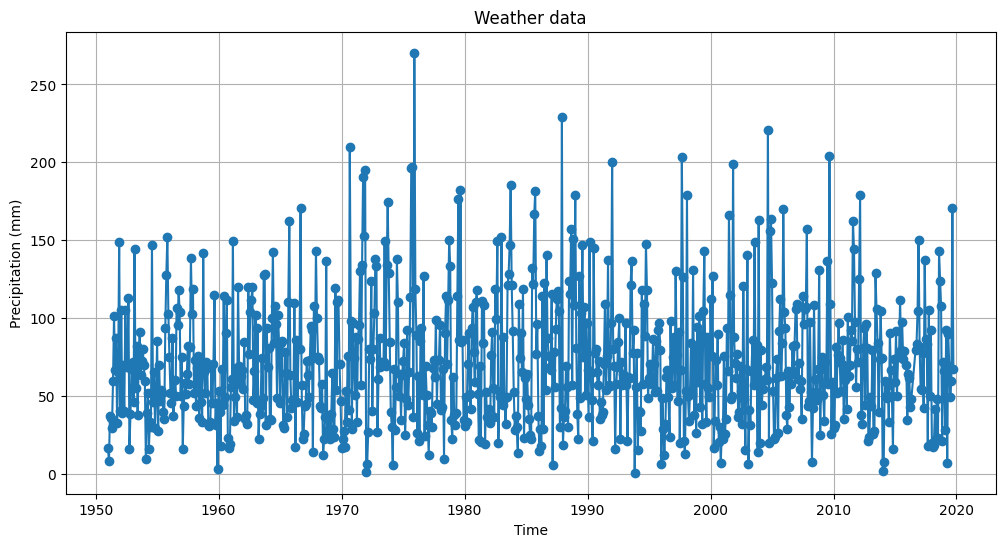

In [92]:
plot_values(df_weather, title="Weather data", ylabel="Precipitation (mm)")

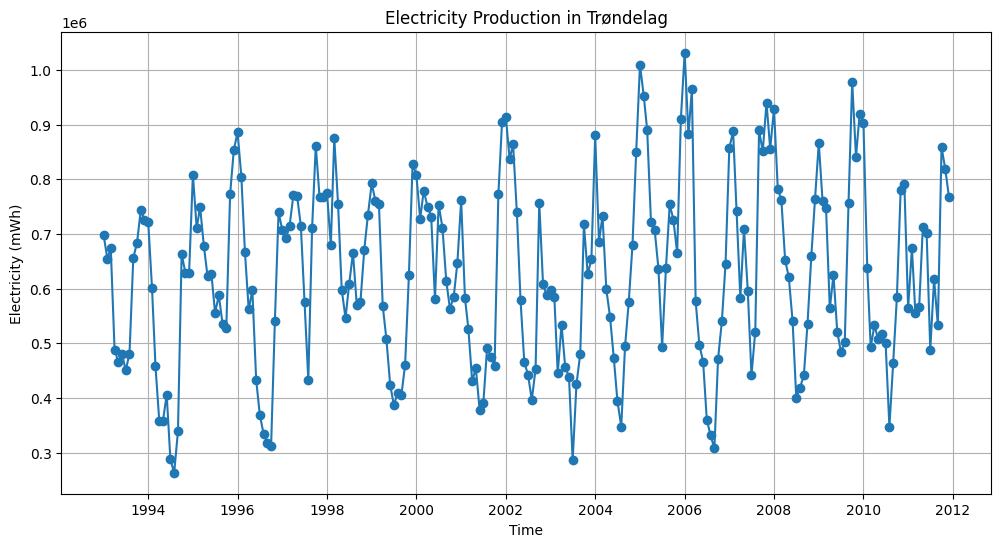

In [93]:
plot_values(df_electricity, title="Electricity Production in Trøndelag", ylabel="Electricity (mWh)")

In [94]:
correlation = df_weather['value'].corr(df_electricity['value'])
# TODO: Merge that stuff
# merged_df = pd.merge(df_weather, df_electricity, on="time")
# merged_df.head()
print(correlation)

-0.06170420388379766


In [95]:
df_weather['rolling_mean_precipitation'] = df_weather['value'].rolling(window=30).mean()
df_electricity['rolling_mean_electricity'] = df_electricity['value'].rolling(window=30).mean()

In [96]:
df_electricity.describe()

,value,time,rolling_mean_electricity
count,2.280000e+02,228,199.000000
mean,6.273899e+05,2002-06-16 13:41:03.157894784,630689.866164
min,2.629900e+05,1993-01-01 00:00:00,542170.000000
25%,4.935690e+05,1997-09-23 12:00:00,608055.550000
50%,6.249945e+05,2002-06-16 00:00:00,632683.600000
75%,7.545198e+05,2007-03-08 18:00:00,655791.983333
max,1.031794e+06,2011-12-01 00:00:00,707996.733333
std,1.670362e+05,NaN,38728.726150


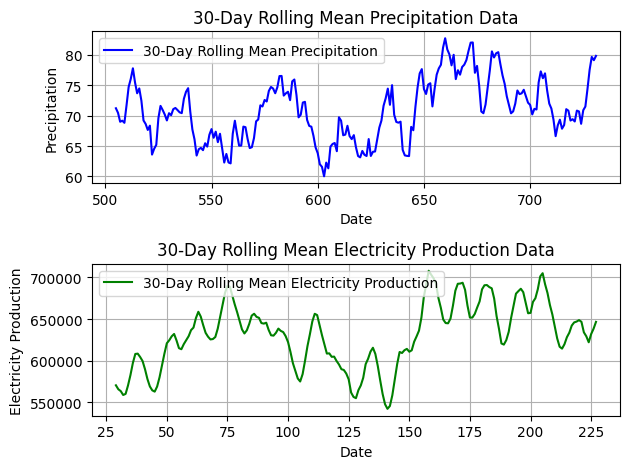

In [98]:
df_weather['time'] = df_weather['time'].dt.tz_localize(None)
df_electricity['time'] = df_electricity['time'].dt.tz_localize(None)

filtered_weather_df = df_weather[(df_weather['time'] > df_electricity['time'].min()) & (df_weather['time'] < df_electricity['time'].max())]
plt.subplot(2, 1, 1)
plt.plot(filtered_weather_df.index, filtered_weather_df['rolling_mean_precipitation'], label='30-Day Rolling Mean Precipitation', color='blue')
plt.title('30-Day Rolling Mean Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(df_electricity.index, df_electricity['rolling_mean_electricity'], label='30-Day Rolling Mean Electricity Production', color='green')
plt.title('30-Day Rolling Mean Electricity Production Data')
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()